In [18]:
import pandas as pd
from pyAudioProcessing.extract_features import get_features




In [19]:
# or if you have a dir with  sub-folders and audios
features = get_features(folder_path="fan/id_00", feature_names=["gfcc", "mfcc"])

# features is a dictionary that will hold data of the following format
"""
{
  music: {file1_path: {"features": <list>, "feature_names": <list>}, ...},
  speech: {file1_path: {"features": <list>, "feature_names": <list>}, ...},
  ...
}
"""


        
 Extracting features gfcc, mfcc 

        


'\n{\n  music: {file1_path: {"features": <list>, "feature_names": <list>}, ...},\n  speech: {file1_path: {"features": <list>, "feature_names": <list>}, ...},\n  ...\n}\n'

In [20]:
%store features

Stored 'features' (dict)


In [21]:
from pyAudioProcessing import utils
utils.write_to_json("audio_features.json", features)


Results saved in audio_features.json



In [22]:
from pyAudioProcessing import plot

plot.spectrogram('fan/id_00/normal/00000400.wav',
    show=True,
    )

FileNotFoundError: [Errno 2] No such file or directory: 'fan/id_00/normal/00000400.wav'

In [ ]:
plot.spectrogram('fan/id_00/abnormal/00000001.wav',
                 show=True,
                 )

In [ ]:
import os
import pathlib
import time

import numpy as np
import pydub
import librosa


In [ ]:
def load_data(machine, Data = 'normal', base_dir = 'data/', id = [0, 2, 4, 6]):
    '''
     Find the audio directory
     Inputs:
     machine: Name of the machine (valve/slider/fan/pump)
     id: ID of the machine (0,2,4,6)
     base_dir = Base directory of the dataset

     Outputs:
     dir = List of data adresses
     label = List of labels (0 -> normal, 1 -> abnormal)
     '''


    dir = []
    label = []

    for id in id:
        normaldir = base_dir + machine + '/id_' + str(format(id,'02d')) + '/normal'
        abnormaldir = base_dir + machine + '/id_' + str(format(id,'02d')) + '/abnormal'
        if Data == 'normal':
            list = os.listdir(normaldir)
            for i in list:
                dir_address = normaldir + '/' + i
                dir.append(dir_address)
                label.append(0)

        else:
            list = os.listdir(abnormaldir)
            for i in list:
                dir_address = abnormaldir + '/' + i
                dir.append(dir_address)
                label.append(1)

    return dir,label


In [ ]:
import pandas as pd
device='fan'
dir,label = load_data(device)

dir_abnormal,label_abnormal = load_data(device, Data='abnormal')


f1 = {'filename': (dir_abnormal + dir), 'label': (label_abnormal + label)}
df = pd.DataFrame(f1)
df

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sb
sb.set(style="white", palette="muted")


In [ ]:
import random
random.seed(20150420)

In [ ]:
def mfcc_extract(filename):

    y, sr  = librosa.load(filename, sr = 16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=2048, hop_length=512)
    return mfcc


df['mfcc']=df['filename'].apply(lambda x: mfcc_extract(x))

In [27]:
df[df['label'] == 0]['mfcc']

1475    [[-414.19162, -386.78836, -387.35043, -385.105...
1476    [[-411.87857, -380.4433, -381.9435, -382.5251,...
1477    [[-398.79056, -369.15686, -373.98843, -374.572...
1478    [[-414.07602, -386.88446, -374.26672, -370.234...
1479    [[-419.86975, -400.00827, -400.94128, -396.505...
                              ...                        
5545    [[-384.33212, -357.8918, -361.90228, -359.018,...
5546    [[-392.96362, -376.03708, -382.9918, -380.2387...
5547    [[-381.95618, -360.62756, -356.97162, -359.652...
5548    [[-385.02023, -356.66458, -355.73117, -354.867...
5549    [[-385.66666, -357.8429, -358.15588, -363.7211...
Name: mfcc, Length: 4075, dtype: object

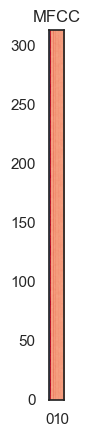

In [28]:


from matplotlib import cm

fig, ax = plt.subplots()
mfcc_data= np.swapaxes(df[df['label'] == 0]['mfcc'][1476], 0, 1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
ax.set_title('MFCC')

plt.show()